# Using Data Science to study Covid's Cases around the world

## Knowing the Database:

First of all, we'll use the data base taken from github:


> https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv



In [1]:
import pandas as pd

Firstly we'll use the confirmed cases:

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,185930,186120,186393,186697,187037,187109,187442,187685,187966,188202
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,312375,313582,314561,315337,316145,316976,317514,317681,318638,319444
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,267546,267657,267777,267902,268033,268141,268254,268356,268478,268584
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45508,45508,45793,45793,45793,45793,45793,45793,45793,45899
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102301,102301,102301,102301,102636,102636,102636,102636,102636,102636


In [4]:
confirmed.shape

(285, 936)

And then, we'll use the deaths and recoveries:

In [5]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [6]:
display(deaths.head())

display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7751,7751,7752,7752,7752,7752,7752,7753,7753,7753
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3548,3550,3551,3554,3557,3560,3563,3566,3566,3567
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6876,6876,6876,6877,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1912,1912,1912,1912,1917,1917,1917,1917,1917,1917


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that there is something wrong about the Database of recovered cases, since, in the last day, all countries mark zero recoveries.

**Obs:Due to this be an important data to calculate the Lethality Ratio of the disease, we'll address to that later.**

## Now we'll see which Provinces/States affected by covid we have in our database:

In [7]:
confirmed["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

And which countries we have:

In [8]:
confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

**Looking at the Country/Region we can notice that we have Countries just like Winter Olympics 2022, Summer Olympics 2020 or even cruise names such as Diamond Princess, we gonna assume that this is correct**

Now, if we want a specific province (for example, Anhui):

First we do....

In [9]:
confirmed.set_index("Province/State")

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,185930,186120,186393,186697,187037,187109,187442,187685,187966,188202
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,312375,313582,314561,315337,316145,316976,317514,317681,318638,319444
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,267546,267657,267777,267902,268033,268141,268254,268356,268478,268584
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,45508,45508,45793,45793,45793,45793,45793,45793,45793,45899
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,102301,102301,102301,102301,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,682096,691065,691065,691065,691065,691065,691065,697447,697447,697447
NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11877,11877,11877,11895,11895,11895,11895,11903,11903,11903


And then...

In [10]:
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region       China
Lat                31.8257
Long              117.2264
1/22/20                  1
1/23/20                  9
                    ...   
8/6/22                1504
8/7/22                1504
8/8/22                1504
8/9/22                1504
8/10/22               1504
Name: Anhui, Length: 935, dtype: object

## Sorting by Country:

In [11]:
confirmed['Country/Region'].value_counts() 

China             34
Canada            16
United Kingdom    14
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 199, dtype: int64

**Fake value because the error is too big:**

*   Will not be considered in the analysis because there are too many blanke spaces.
*   The reporting pattern of each country has a lot of disparity.

In [12]:
confirmed_by_country=confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,185930,186120,186393,186697,187037,187109,187442,187685,187966,188202
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,312375,313582,314561,315337,316145,316976,317514,317681,318638,319444
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,267546,267657,267777,267902,268033,268141,268254,268356,268478,268584
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,45508,45508,45793,45793,45793,45793,45793,45793,45793,45899
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,102301,102301,102301,102301,102636,102636,102636,102636,102636,102636


Now, if we want to see the number of cases confirmed in a specific country(for example: Brazil), we can do....

In [13]:
confirmed_by_country.loc["Brazil"][2:]

1/22/20           0.0
1/23/20           0.0
1/24/20           0.0
1/25/20           0.0
1/26/20           0.0
              ...    
8/6/22     34011173.0
8/7/22     34018371.0
8/8/22     34035780.0
8/9/22     34066000.0
8/10/22    34066000.0
Name: Brazil, Length: 932, dtype: float64

## And then, we can plot the number of cases:

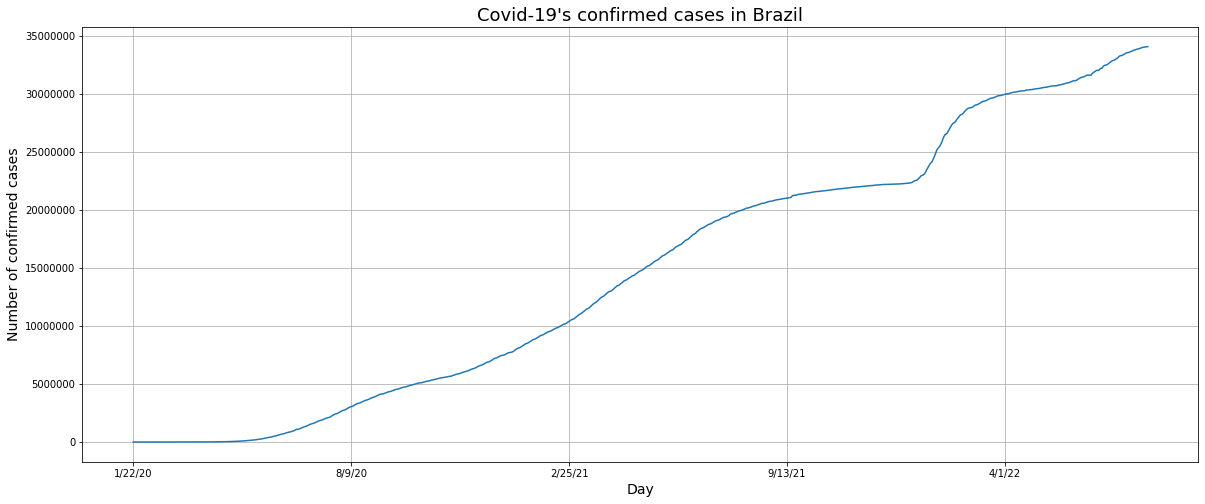

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Covid-19's confirmed cases in Brazil",fontsize = 18)
plt.ylabel("Number of confirmed cases",fontsize=14)
plt.xlabel("Day",fontsize=14)
confirmed_by_country.loc["Brazil"][2:].plot()
plt.grid(True)
plt.show()

In the regions of the graph with a higher slope, we have bigger rates of contamination, in the flatter regions, we have a stabilization in the disease's propagation.

## Now we calculate the number of new cases:

We can do that, by doing....

In [15]:
new_cases_brazil= confirmed_by_country.loc["Brazil"][2:].diff().dropna()
new_cases_brazil

1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
1/27/20        0.0
            ...   
8/6/22     16703.0
8/7/22      7198.0
8/8/22     17409.0
8/9/22     30220.0
8/10/22        0.0
Name: Brazil, Length: 931, dtype: float64

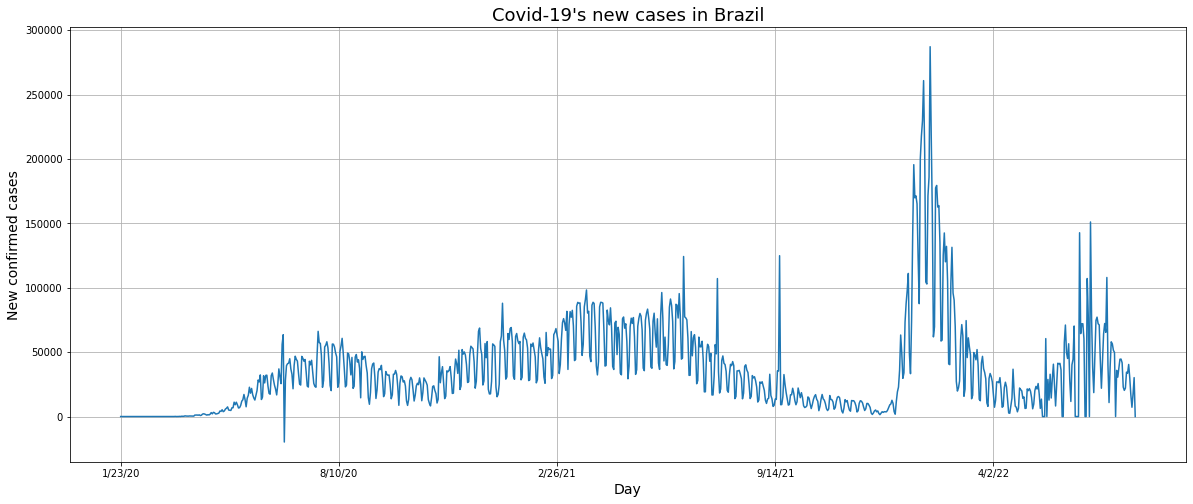

In [16]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Covid-19's new cases in Brazil",fontsize = 18)
plt.ylabel("New confirmed cases",fontsize=14)
plt.xlabel("Day",fontsize=14)
new_cases_brazil.plot()
plt.grid(True)
plt.show()

We can see that in the beginning there was a negative number of confirmed cases, this could be explained by a review in the data.

We can also see that in the end there is a realy high peak in the number of new confirmed cases. This can also be explained by a review in the data, or it could be a new peak of the disease's propagation, even with a high number of vaccinated people.

**It is important to remind that we are only seeing the number of new confimed cases and not the number of deaths or the severity of the disease, so, at the end, Brazil could have  reach the peak of the disease's propagation,but due to the vaccination the number of serious cases/deaths for the disease could be smaller**



## Let's see the cases globally:

In [17]:
last_date = confirmed.columns[-1]
last_date

'8/10/22'

Let's see the top 10:

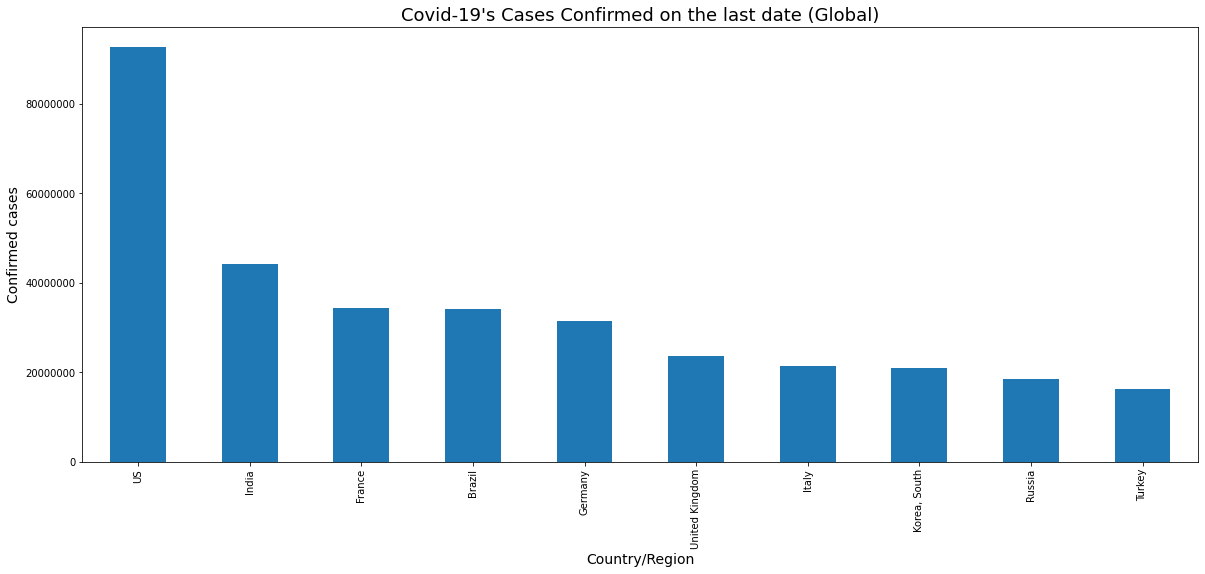

In [18]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Covid-19's Cases Confirmed on the last date (Global)",fontsize = 18)
plt.ylabel("Confirmed cases",fontsize=14)
plt.xlabel("Day",fontsize=14)
confirmed_by_country[last_date].sort_values(ascending = False)[:10].plot(kind='bar')
plt.show()

## Now we'll analyse the deaths and the recovered cases:

We gonna make a function that returns the latest updates by country:

In [19]:
def latest_by_country(data):
  return data.groupby('Country/Region').sum()[last_date]

latest_by_country(confirmed).head()

Country/Region
Afghanistan    188202
Albania        319444
Algeria        268584
Andorra         45899
Angola         102636
Name: 8/10/22, dtype: int64

In [20]:
informations = [latest_by_country(confirmed),latest_by_country(deaths),latest_by_country(recovered)]

combined  = pd.concat(informations,axis=1)
combined.columns = ["confirmed","deaths","recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,188202,7753,0
Albania,319444,3567,0
Algeria,268584,6878,0
Andorra,45899,154,0
Angola,102636,1917,0


Let's compare with the 3 arrays:

In [21]:
display(latest_by_country(confirmed).head())

display(latest_by_country(deaths).head())

display(latest_by_country(recovered).head())

Country/Region
Afghanistan    188202
Albania        319444
Algeria        268584
Andorra         45899
Angola         102636
Name: 8/10/22, dtype: int64

Country/Region
Afghanistan    7753
Albania        3567
Algeria        6878
Andorra         154
Angola         1917
Name: 8/10/22, dtype: int64

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 8/10/22, dtype: int64

They are equal!

## Let's calculate the lethality ratio:

**It's hard to calculate precisely the lethality ratio during the epidemic**

**In the beginning it is common that only serious cases are reported**

###The calculation will be:

In [22]:
sum_up = combined.sum()

lethality_ratio=sum_up["deaths"]/sum_up["confirmed"]
print("{} %".format(round(lethality_ratio*100,2)))

1.09 %


**1.1% of the cases that are confirmed in our dataset died**

## Let's separate the Lethality ratio by country:

In [23]:
lethality_ratio = (combined["deaths"]/combined["confirmed"])*100
combined["lethality_ratio"]= lethality_ratio
combined.head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
Afghanistan,188202,7753,0,4.119510
Albania,319444,3567,0,1.116628
Algeria,268584,6878,0,2.560838
Andorra,45899,154,0,0.335519
Angola,102636,1917,0,1.867766


Let's see which countries have the highest Lethality Ratio:

In [24]:
combined.sort_values("lethality_ratio",ascending = False).head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
"Korea, North",1,6,0,600.000000
MS Zaandam,9,2,0,22.222222
Yemen,11903,2152,0,18.079476
Sudan,63128,4960,0,7.857052
Syria,56634,3156,0,5.572624


We can see that there is something wrong with North Korea data, since there is only one case confirmed and nine deaths.Let's drop North Korea from our database.

In [25]:
combined.drop("Korea, North",inplace= True)

combined.sort_values("lethality_ratio",ascending = False).head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
MS Zaandam,9,2,0,22.222222
Yemen,11903,2152,0,18.079476
Sudan,63128,4960,0,7.857052
Syria,56634,3156,0,5.572624
Peru,3992728,214788,0,5.379480


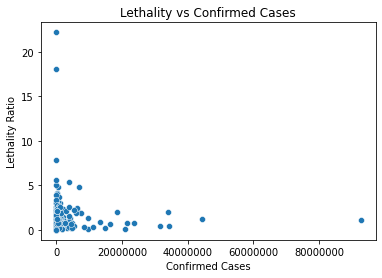

In [26]:
import seaborn as sns 

plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = combined , x = 'confirmed',y = 'lethality_ratio').set(
    title=("Lethality vs Confirmed Cases"),
    xlabel = "Confirmed Cases" , 
    ylabel = "Lethality Ratio")
plt.show()

We can see that countries with a small number of confirmed cases tend to have a bigger lethality ratio, that's because they haven't acquired enough data yet.

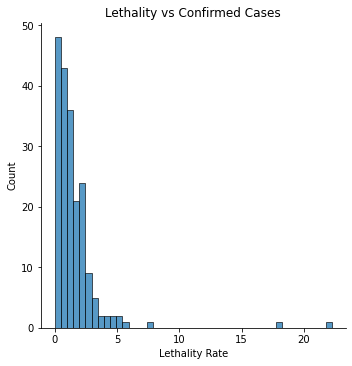

In [27]:
sns.displot(combined["lethality_ratio"],kde=False).set(
    title=("Lethality vs Confirmed Cases"),
    xlabel = "Lethality Rate")
plt.show()

Let's remake the top 5 countries with the highest Lethality Ratio considering only Countries that have more than 40 confirmed cases of the disease:

In [28]:
combined.query("confirmed > 40").sort_values("lethality_ratio",ascending = False).head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
Yemen,11903,2152,0,18.079476
Sudan,63128,4960,0,7.857052
Syria,56634,3156,0,5.572624
Peru,3992728,214788,0,5.379480
Somalia,27020,1361,0,5.037010


Now, we want to calculate this Lethality Ration using another formula, such as: 

          Lethality Ratio = Number of deaths/ (Number of deaths + Number of recovered cases)


This is a more accurate way to calculate this ratio, since there are people still recoverying from COVID-19, and we don't know if they will die or recover.

That is, the number of confirmed cases that we used above is actually equal to:

       Number of confirmed cases = Number of deaths + Number of recovered cases + Number of people still on recovery


But, to do this, firstly we'll have to deal with the problem on our Recovered Cases's Database

In [29]:
combined.head(5)

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
Afghanistan,188202,7753,0,4.119510
Albania,319444,3567,0,1.116628
Algeria,268584,6878,0,2.560838
Andorra,45899,154,0,0.335519
Angola,102636,1917,0,1.867766


They're all equal to 0

Let's see the last date that have the data of the recovered:

In [30]:
recovered_by_country = recovered.groupby("Country/Region").sum()
recovered_by_country

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
last_date_recovered = recovered_by_country.columns[2]
for i in range(2,recovered_by_country.shape[1]):
  date = recovered_by_country.columns[i]
  verify = recovered_by_country[recovered_by_country[date]!=0]
  if len(verify) >= 0.92*len(recovered_by_country):
    save_verify = verify
    last_date_recovered = date
last_date_recovered


'8/4/21'

Let's see how many countries have reported at this date:

In [32]:
print('{} countries have reported untill, that correponds to {} % of our database'.format(len(save_verify),round((len(save_verify)/len(recovered_by_country)*100),2)))

188 countries have reported untill, that correponds to 94.47 % of our database


Let's see the countries that haven't reported on this date:

In [33]:
all_countries =  recovered_by_country.index
all_countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=199)

In [34]:
countries_on_last_date_recovered = save_verify.index
countries_on_last_date_recovered

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=188)

In [35]:
countries_not_on_last_date_recovered = list()
for country in all_countries:
  if country not in countries_on_last_date_recovered:
    countries_not_on_last_date_recovered.append(country)
countries_not_on_last_date_recovered

['Antarctica',
 'Belgium',
 'Kiribati',
 'Korea, North',
 'Palau',
 'Serbia',
 'Summer Olympics 2020',
 'Sweden',
 'Tonga',
 'US',
 'Winter Olympics 2022']

Those are the countries that have not reported on 8/4/21.

We can see that US, that had a significant number of confirmed cases will be excluded from our study. Let's see the last date that US reported:


In [36]:
last_date_recovered = recovered_by_country.columns[2]
for i in range(2,recovered_by_country.shape[1]):
  date = recovered_by_country.columns[i]
  verify = recovered_by_country[recovered_by_country[date]!=0]
  if len(verify) >= 0.92*len(recovered_by_country) and 'US' in verify.index:
    save_verify = verify
    last_date_recovered = date
last_date_recovered

'12/13/20'


Let's also see which countries did not report that day:

In [37]:
countries_on_last_date_recovered = save_verify.index
countries_on_last_date_recovered

countries_not_on_last_date_recovered = list()
for country in all_countries:
  if country not in countries_on_last_date_recovered:
    countries_not_on_last_date_recovered.append(country)
countries_not_on_last_date_recovered

['Antarctica',
 'Belgium',
 'Kiribati',
 'Korea, North',
 'Micronesia',
 'Palau',
 'Serbia',
 'Summer Olympics 2020',
 'Sweden',
 'Tonga',
 'Winter Olympics 2022']

We can see that US have came out of the list and Micronesia has came in  the list.

So let's remake our Database taking these countries and considering the calculus untill this date.

Let's start by remaking the combined list

In [38]:
def latest_by_country_at(data,date):
  return data.groupby('Country/Region').sum()[date]


In [39]:
informations = [latest_by_country_at(confirmed,last_date_recovered),
                latest_by_country_at(deaths,last_date_recovered),
                latest_by_country_at(recovered,last_date_recovered)]

combined2  = pd.concat(informations,axis=1)
combined2.columns = ["confirmed","deaths","recovered"]
combined2.drop(countries_not_on_last_date_recovered,inplace= True)
combined2.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,48952,1960,38250
Albania,48530,1003,24820
Algeria,92102,2596,60457
Andorra,7338,79,6629
Angola,16188,371,8898


Now that we have our recovered's data let's remake the calculations

Firstly, we'll recalculate the lethality ration in the original formula:

In [40]:
sum_up = combined2.sum()

lethality_ratio=sum_up["deaths"]/sum_up["confirmed"]
print(" Global Lethality ratio: {} %".format(round(lethality_ratio*100,2)))

 Global Lethality ratio: 2.31 %


And we'll also separate by country:

In [41]:
lethality_ratio_1 = (combined2["deaths"]/combined2["confirmed"])*100
combined2["lethality_ratio_1(%)"]= lethality_ratio_1
combined2.head()

,confirmed,deaths,recovered,lethality_ratio_1(%)
Country/Region,,,,
Afghanistan,48952,1960,38250,4.003922
Albania,48530,1003,24820,2.066763
Algeria,92102,2596,60457,2.818614
Andorra,7338,79,6629,1.076588
Angola,16188,371,8898,2.291821


Let's sort this list:

In [42]:
combined2.sort_values("lethality_ratio_1(%)",ascending = False).head(10)

,confirmed,deaths,recovered,lethality_ratio_1(%)
Country/Region,,,,
Yemen,2083,606,1383,29.092655
MS Zaandam,9,2,7,22.222222
Peru,980943,90797,916335,9.256093
Mexico,1250044,113953,918681,9.115919
Ecuador,202110,13875,177951,6.865073
Sudan,21591,1347,12313,6.238711
Bolivia,147150,9018,126221,6.128440
Chad,1770,102,1607,5.762712
Egypt,121575,6920,104875,5.691960


Now let's calculate using the second formula:

In [43]:
lethality_ratio_2=sum_up["deaths"]/(sum_up["deaths"] + sum_up["recovered"])
print(" Global Lethality ratio (second formula): {} %".format(round(lethality_ratio_2*100,2)))

 Global Lethality ratio (second formula): 3.36 %


In [44]:
lethality_ratio_2 = ((100*combined2["deaths"])/(combined2["deaths"] + combined2["recovered"]))
combined2["lethality_ratio_2(%)"]= lethality_ratio_2
combined2["deaths and recovered"] =  combined2["deaths"] + combined2["recovered"] # We'll use this on a graph 
combined2.sort_values("lethality_ratio_2(%)",ascending = False).head(10)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered
Country/Region,,,,,,
United Kingdom,1854353,64267,4016,3.465737,94.118595,68283
Netherlands,632024,10134,7872,1.603420,56.281240,18006
Yemen,2083,606,1383,29.092655,30.467572,1989
France,2432601,58014,182685,2.384855,24.102302,240699
Spain,1730575,47624,150376,2.751918,24.052525,198000
MS Zaandam,9,2,7,22.222222,22.222222,9
Mexico,1250044,113953,918681,9.115919,11.035178,1032634
Syria,9166,518,4376,5.651320,10.584389,4894
Tanzania,509,21,183,4.125737,10.294118,204


We can see that UK and Netherlands are now at the top of the list, with very high Lethality's ratios.

This could be explained by the little recovered's data that they have. 


They were probably going through a wave of contamination, where most cases had contracted the disease, but were still being treated.


Let's finish by redoing the two graphs:

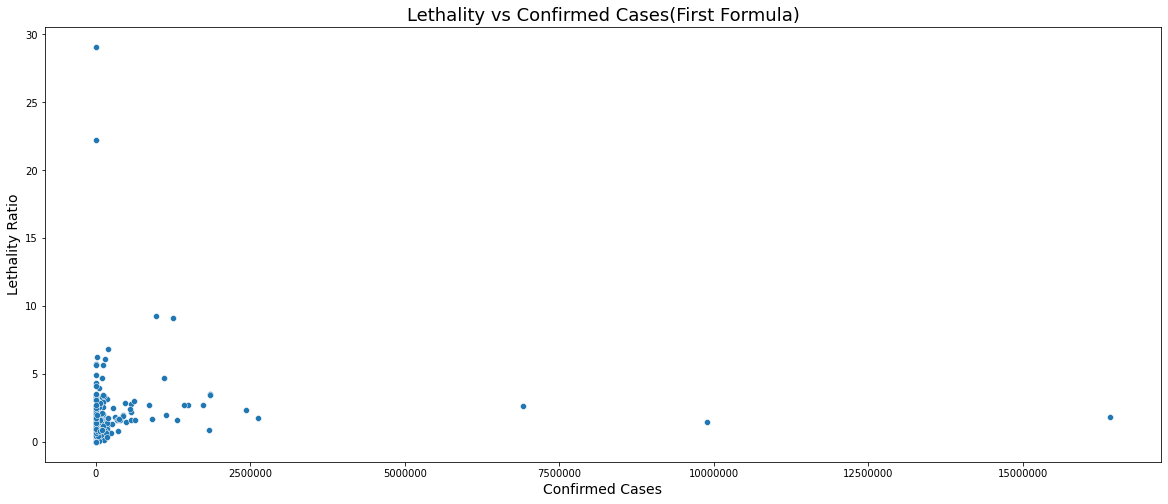

In [45]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = combined2 , x = 'confirmed',y = 'lethality_ratio_1(%)')
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Lethality vs Confirmed Cases(First Formula)",fontsize = 18)
plt.ylabel("Lethality Ratio",fontsize=14)
plt.xlabel("Confirmed Cases",fontsize=14)
plt.show()

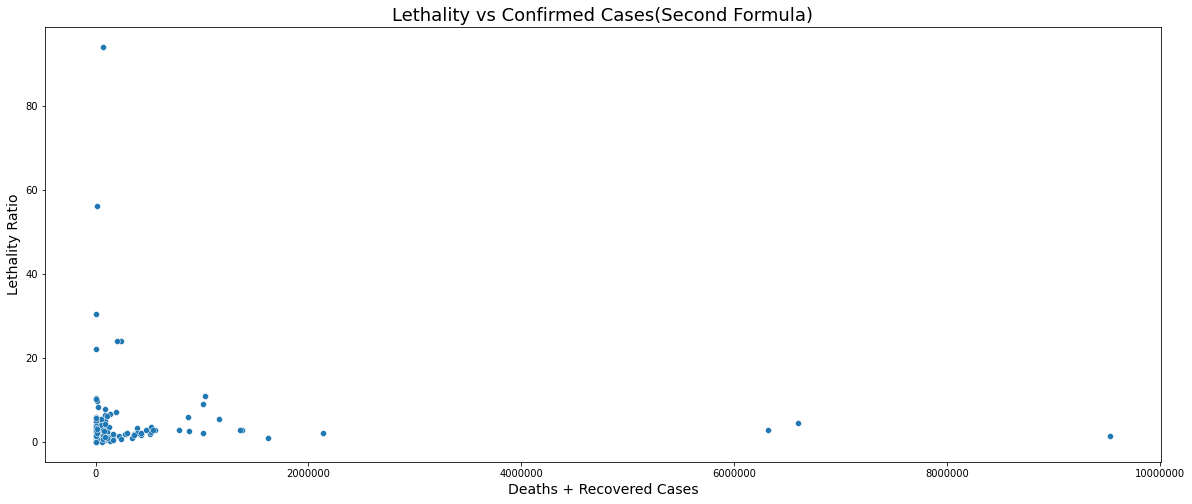

In [46]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = combined2 , x = 'deaths and recovered',y = 'lethality_ratio_2(%)')
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Lethality vs Confirmed Cases(Second Formula)",fontsize = 18)
plt.ylabel("Lethality Ratio",fontsize=14)
plt.xlabel("Deaths + Recovered Cases",fontsize=14)
plt.show()

Those graphs show us that higher the number of confirmed cases, lower is the lethality ratio 

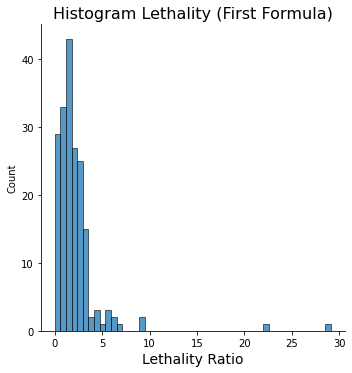

In [47]:
sns.displot(combined2["lethality_ratio_1(%)"],kde=False)
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Histogram Lethality (First Formula)",fontsize = 16)
plt.xlabel("Lethality Ratio",fontsize=14)
plt.show()

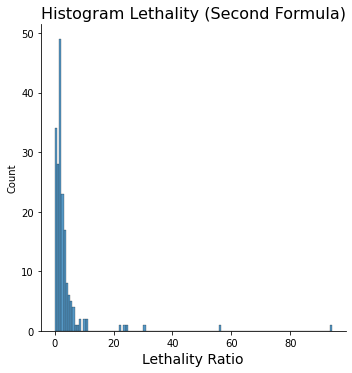

In [48]:
sns.displot(combined2["lethality_ratio_2(%)"],kde=False)
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Histogram Lethality (Second Formula)",fontsize = 16)
plt.xlabel("Lethality Ratio",fontsize=14)
plt.show()

We can see that most of the countries have a Lethality Ratio close to the Global Value (3.36%)

# Part 2: 

Let's see how many cases the US has in comparison with the rest of the world.

In [49]:
confirmed["Country/Region"] == "US"

0      False
1      False
2      False
3      False
4      False
       ...  
280    False
281    False
282    False
283    False
284    False
Name: Country/Region, Length: 285, dtype: bool

Let's put this on the confirmed database:

In [50]:
confirmed["is_confirmed_US"] = confirmed["Country/Region"] == "US"
confirmed

import numpy as np

np.where(confirmed["is_confirmed_US"],"US","Others")

confirmed["is_confirmed_US_label"] = np.where(confirmed["is_confirmed_US"],"US","Others")

confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22,8/9/22,8/10/22,is_confirmed_US,is_confirmed_US_label
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,186393,186697,187037,187109,187442,187685,187966,188202,False,Others
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,314561,315337,316145,316976,317514,317681,318638,319444,False,Others
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,267777,267902,268033,268141,268254,268356,268478,268584,False,Others
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45793,45793,45793,45793,45793,45793,45793,45899,False,Others
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102301,102301,102636,102636,102636,102636,102636,102636,False,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,691065,691065,691065,691065,691065,697447,697447,697447,False,Others
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,False,Others
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11877,11895,11895,11895,11895,11903,11903,11903,False,Others
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,330575,330575,331074,331074,331358,331358,331568,331568,False,Others


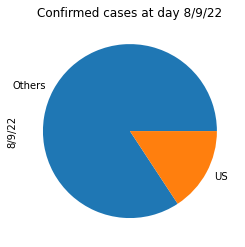

In [51]:
last_date_confirmed = "8/9/22"
confirmed.groupby("is_confirmed_US_label").sum()[last_date_confirmed].plot(kind='pie')
#plt.title("Confirmed cases at day {}".format(last_date_confirmed))
plt.title(f"Confirmed cases at day {last_date_confirmed}")
plt.show()

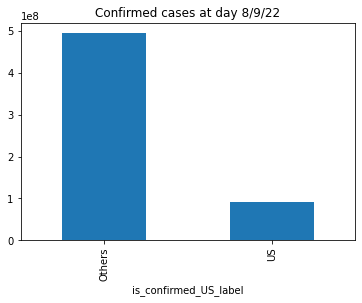

In [52]:
confirmed.groupby("is_confirmed_US_label").sum()[last_date_confirmed].plot(kind='bar')
plt.title(f"Confirmed cases at day {last_date_confirmed}")
plt.show()

The US's cases corresponds to 1/5 of all cases from all other countries.

Let's see the number of confirmed cases at the day 8/9/22:

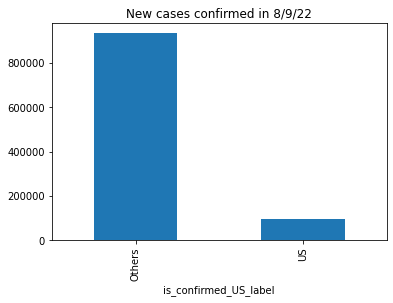

In [53]:
summed = confirmed.groupby("is_confirmed_US_label").sum()
summed["delta"] = summed["8/9/22"] - summed["8/8/22"]
summed["delta"].plot(kind = 'bar')

plt.title(f"New cases confirmed in {last_date_confirmed}")
plt.show()

The number of new cases confirmed is much smaller than the rest of the world.

In [54]:
summed.T 

is_confirmed_US_label,Others,US
Lat,5.670336e+03,40.0
Long,6.419869e+03,-100.0
1/22/20,5.560000e+02,1.0
1/23/20,6.560000e+02,1.0
1/24/20,9.420000e+02,2.0
...,...,...
8/8/22,4.931742e+08,92256431.0
8/9/22,4.941085e+08,92351595.0
8/10/22,4.949241e+08,92569245.0
is_confirmed_US,0.000000e+00,1.0


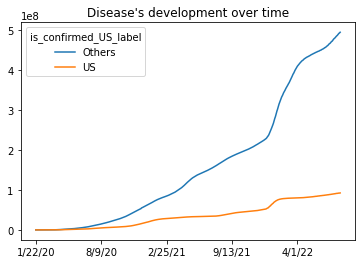

In [55]:
summed.T[2:-2].plot()
plt.title("Disease's development over time")
plt.show()

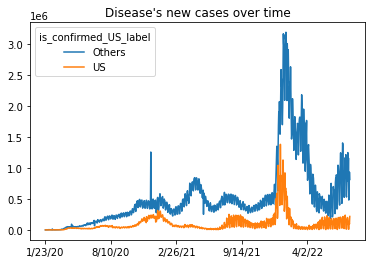

In [56]:
differences = summed.T[2:-2].diff().dropna()
differences.plot()
plt.title("Disease's new cases over time")
plt.show()

Let's calculate the incidence ratio of COVID-19:

Firstly we'll use:

In [57]:
cases = confirmed.groupby("is_confirmed_US_label").sum()[last_date_confirmed].loc["US"]
US_population= 332403650

incidence_ratio = cases/US_population
incidence_ratio

0.2778296658294817

That's a dangerous formula, because if we calculate this way in the beggining of the disease, we'll probably will take a population bigger than the population actually exposed.

We should calculate this by State

## Let's now take a population's data:

In [58]:
un_population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2022_Demographic_Indicators_Medium.zip')
un_population["PopTotal"] = un_population["TPopulation1Jan"]*1000
un_population

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR,PopTotal
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.00,0.000,2.477675e+09
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.00,0.000,2.520970e+09
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.00,0.000,2.565291e+09
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.00,0.000,2.615251e+09
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.00,0.000,2.665307e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43467,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,...,28.0450,7.5105,6.3613,8.6783,21.0197,20.2116,21.8411,-0.01,-0.995,1.006300e+04
43468,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,...,27.4133,7.3642,6.2703,8.4752,20.6236,19.9248,21.3338,-0.01,-1.000,1.000900e+04
43469,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,...,26.9919,7.2513,6.1793,8.3398,20.3113,19.6379,20.9955,-0.01,-1.005,9.969000e+03
43470,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,...,26.6620,7.1535,6.0883,8.2346,20.0363,19.3509,20.7325,-0.01,-1.011,9.911000e+03


Since we are using the data until Dec/ 2020 Let's take the census of Jan/2021 (The closest).

In [59]:
un_population.query("Time == 2021")

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR,PopTotal
71,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,162.3681,81.7341,98.8951,63.6732,160.6297,195.0349,124.6520,0.000,0.000,7.876932e+09
223,3,1834,b,NaN,NaN,202.0,12,SDG region,1828,Sub-Saharan Africa,...,336.7504,179.7655,200.4508,158.8545,308.0135,344.6500,271.4239,-427.925,-0.376,1.123665e+09
375,4,1833,NaN,NaN,NaN,747.0,12,SDG region,1828,Northern Africa and Western Asia,...,120.7154,53.9456,65.8349,40.5438,129.6414,159.3384,96.4137,-500.970,-0.918,5.415211e+08
527,5,1831,NaN,NaN,NaN,62.0,12,SDG region,1828,Central and Southern Asia,...,201.3412,91.0809,108.9069,72.1667,204.5486,238.4666,168.2660,-980.532,-0.475,2.055775e+09
679,6,1832,NaN,NaN,NaN,753.0,12,SDG region,1828,Eastern and South-Eastern Asia,...,89.2931,48.8825,60.8812,36.0772,104.5900,133.0757,74.7551,-141.988,-0.061,2.337114e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42783,286,882,NaN,WSM,WS,882.0,4,Country/Area,957,Samoa,...,123.2896,62.9076,76.4246,48.6671,141.0046,171.5619,107.1812,-0.882,-4.023,2.168000e+05
42935,287,772,35.0,TKL,TK,772.0,4,Country/Area,957,Tokelau,...,142.0636,63.7944,59.0498,68.5334,133.6070,133.4291,134.9827,0.000,0.000,1.837000e+03
43087,288,776,NaN,TON,TO,776.0,4,Country/Area,957,Tonga,...,169.5006,97.2235,113.6738,82.1148,194.0225,230.4804,157.1635,-0.948,-8.901,1.056350e+05
43239,289,798,NaN,TUV,TV,798.0,4,Country/Area,957,Tuvalu,...,236.9038,173.2275,216.9833,121.3143,308.8835,382.9423,215.5717,-0.015,-1.338,1.114000e+04


In [60]:
un_population.describe()

,SortOrder,LocID,SDMX_code,LocTypeID,ParentID,VarID,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,...,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR,PopTotal
count,43472.000000,43472.000000,42864.000000,43472.000000,43472.000000,43472.0,43472.000000,4.347200e+04,4.318600e+04,4.318600e+04,...,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,4.347200e+04
mean,147.332168,597.363636,410.088652,4.311189,1217.958042,2.0,2025.500000,2.437960e+05,2.440243e+05,1.221311e+05,...,167.528194,88.623107,104.664994,72.058302,160.871913,191.272787,129.502431,-26.787488,-0.023250,2.437960e+08
std,82.836780,565.624103,268.838375,1.898958,1004.616135,0.0,43.878176,9.533881e+05,9.536740e+05,4.779175e+05,...,159.337831,84.139463,91.902748,77.690070,121.131403,131.796086,112.327630,421.691260,10.670331,9.533881e+08
min,1.000000,4.000000,1.000000,1.000000,0.000000,2.0,1950.000000,5.080000e-01,5.100000e-01,2.460000e-01,...,3.686800,2.164700,2.904400,1.328700,5.556600,7.446900,3.576300,-8636.202000,-526.323000,5.080000e+02
25%,76.000000,266.000000,158.000000,4.000000,914.000000,2.0,1987.750000,6.073463e+02,6.103307e+02,3.064090e+02,...,49.415325,27.297075,35.225125,18.750625,63.509825,81.957125,44.202025,-12.499000,-1.381000,6.073462e+05
50%,147.500000,529.500000,415.500000,4.000000,922.000000,2.0,2025.500000,7.227150e+03,7.243970e+03,3.576372e+03,...,109.848150,61.788700,79.642850,42.674800,133.883450,170.604950,94.268300,-0.500000,-0.168000,7.227150e+06
75%,219.000000,792.000000,643.000000,4.000000,931.000000,2.0,2063.250000,4.826893e+04,4.834286e+04,2.392126e+04,...,230.770550,119.285875,144.534800,93.922775,223.979800,268.038025,178.899825,1.995000,1.074750,4.826893e+07
max,290.000000,5501.000000,914.000000,13.000000,5501.000000,2.0,2101.000000,1.043105e+07,1.043093e+07,5.192851e+06,...,998.752100,996.165900,999.101700,985.125500,999.602500,999.941800,997.597100,7674.484000,415.239000,1.043105e+10


From the all population's Database, this is what we want:

In [61]:
un_population_total = un_population.query('Time == 2021')[["Location","PopTotal"]].set_index("Location")
un_population_total

,PopTotal
Location,
World,7.876932e+09
Sub-Saharan Africa,1.123665e+09
Northern Africa and Western Asia,5.415211e+08
Central and Southern Asia,2.055775e+09
Eastern and South-Eastern Asia,2.337114e+09
...,...
Samoa,2.168000e+05
Tokelau,1.837000e+03
Tonga,1.056350e+05


Let's unite this with the combine2 Database:

In [62]:
combined2.join(un_population_total)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal
Afghanistan,48952,1960,38250,4.003922,4.874409,40210,39618434.0
Albania,48530,1003,24820,2.066763,3.884134,25823,2861567.0
Algeria,92102,2596,60457,2.818614,4.117171,63053,43812345.0
Andorra,7338,79,6629,1.076588,1.177698,6708,78380.0
Angola,16188,371,8898,2.291821,4.002589,9269,33957975.0
...,...,...,...,...,...,...,...
Vietnam,1397,35,1241,2.505369,2.742947,1276,NaN
West Bank and Gaza,109738,978,85110,0.891214,1.136047,86088,NaN
Yemen,2083,606,1383,29.092655,30.467572,1989,32640962.0
Zambia,18274,367,17388,2.008318,2.067023,17755,19200512.0


In [63]:
combined2.join(un_population_total).sort_values('confirmed',ascending = False)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal
US,16412314,301749,6298082,1.838552,4.572072,6599831,NaN
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,NaN
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07
...,...,...,...,...,...,...,...
Solomon Islands,17,0,5,0.000000,0.000000,5,6.994840e+05
MS Zaandam,9,2,7,22.222222,22.222222,9,NaN
Marshall Islands,4,0,4,0.000000,0.000000,4,4.274600e+04
Samoa,2,0,2,0.000000,0.000000,2,2.168000e+05


Looking at the US population we see that the answer is Nan, That's probably because US must have a different name at this database:

In [64]:
un_population_total.query("Location.str.contains('America')",engine = 'python')

,PopTotal
Location,
Latin America and the Caribbean,6.541482e+08
Europe and Northern America,1.120494e+09
Latin America and the Caribbean,6.541482e+08
Central America,1.770503e+08
South America,4.330059e+08
Northern America,3.746411e+08
United States of America,3.364958e+08
American Samoa,4.562400e+04


We have to change United States of America for US and then combine the database:

In [65]:
def rename_location(location):
  if location =='United States of America':
    return 'US'
  if location =='Russian Federation': #used further
    return 'Russia' 
  if location == 'Türkiye': #used further
    return 'Turkey'
  if location == 'Iran (Islamic Republic of)': #used further
    return 'Iran'
  return location

un_population_total['location_for_who']=un_population_total.index.map(rename_location)
un_population_total.query("location_for_who == 'US'").head()

,PopTotal,location_for_who
Location,,
United States of America,336495769.0,US


In [66]:
combined2.join(un_population_total.set_index("location_for_who")).sort_values("confirmed",ascending = False)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal
US,16412314,301749,6298082,1.838552,4.572072,6599831,3.364958e+08
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,1.454730e+08
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07
...,...,...,...,...,...,...,...
Solomon Islands,17,0,5,0.000000,0.000000,5,6.994840e+05
MS Zaandam,9,2,7,22.222222,22.222222,9,NaN
Marshall Islands,4,0,4,0.000000,0.000000,4,4.274600e+04
Samoa,2,0,2,0.000000,0.000000,2,2.168000e+05


Let's also replace Russia:

Let's get Russia's UN name, and then we run again the code who searchs and replaces the names:

In [67]:
un_population_total.query("Location.str.contains('Russia')",engine = 'python')

,PopTotal,location_for_who
Location,,
Russian Federation,145472994.0,Russia


Let's see if it got replaced:

In [68]:
un_population_total.query("location_for_who == 'Russia'")

,PopTotal,location_for_who
Location,,
Russian Federation,145472994.0,Russia


And let's combine again:

In [69]:
combined2.join(un_population_total.set_index("location_for_who")).sort_values("confirmed",ascending = False).head(20)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal
US,16412314,301749,6298082,1.838552,4.572072,6599831,3.364958e+08
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,1.454730e+08
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07
United Kingdom,1854353,64267,4016,3.465737,94.118595,68283,6.716777e+07
Italy,1843712,64520,1093161,3.499462,5.573211,1157681,5.936126e+07
Turkey,1836728,16417,1603780,0.893818,1.013272,1620197,8.445917e+07
Spain,1730575,47624,150376,2.751918,24.052525,198000,4.739766e+07
Argentina,1498160,40766,1335317,2.721071,2.962467,1376083,4.516362e+07


And Turkey and Iran...

Let's get Turkey's and Iran's UN name, and then we run again the code who searchs and replaces the names:

In [70]:
un_population_total.query("Location.str.contains('Türkiye')",engine = 'python')

,PopTotal,location_for_who
Location,,
Türkiye,84459174.0,Turkey


In [71]:
un_population_total.query("Location.str.contains('Iran')",engine = 'python')

,PopTotal,location_for_who
Location,,
Iran (Islamic Republic of),87590223.0,Iran


Let's see if it got replaced:

In [72]:
un_population_total.query("location_for_who == 'Turkey'")

,PopTotal,location_for_who
Location,,
Türkiye,84459174.0,Turkey


In [73]:
un_population_total.query("location_for_who == 'Iran'")

,PopTotal,location_for_who
Location,,
Iran (Islamic Republic of),87590223.0,Iran


In [74]:
combined2.join(un_population_total.set_index("location_for_who")).sort_values("confirmed",ascending = False).head(20)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal
US,16412314,301749,6298082,1.838552,4.572072,6599831,3.364958e+08
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,1.454730e+08
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07
United Kingdom,1854353,64267,4016,3.465737,94.118595,68283,6.716777e+07
Italy,1843712,64520,1093161,3.499462,5.573211,1157681,5.936126e+07
Turkey,1836728,16417,1603780,0.893818,1.013272,1620197,8.445917e+07
Spain,1730575,47624,150376,2.751918,24.052525,198000,4.739766e+07
Argentina,1498160,40766,1335317,2.721071,2.962467,1376083,4.516362e+07


Now we can make a dropna():


In [75]:
combined_expanded= combined2.join(un_population_total.set_index("location_for_who")).sort_values("confirmed",ascending = False).dropna()
combined_expanded.head()

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal
US,16412314,301749,6298082,1.838552,4.572072,6599831,3.364958e+08
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,1.454730e+08
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07


In [76]:
combined_expanded['incidence_ratio'] = 100000*combined_expanded['confirmed']/ combined_expanded['PopTotal']
combined_expanded

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal,incidence_ratio
US,16412314,301749,6298082,1.838552,4.572072,6599831,3.364958e+08,4877.420613
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09,704.593996
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08,3230.082868
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,1.454730e+08,1807.688787
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07,3771.337247
...,...,...,...,...,...,...,...,...
Holy See,27,0,15,0.000000,0.000000,15,5.150000e+02,5242.718447
Solomon Islands,17,0,5,0.000000,0.000000,5,6.994840e+05,2.430363
Marshall Islands,4,0,4,0.000000,0.000000,4,4.274600e+04,9.357601
Samoa,2,0,2,0.000000,0.000000,2,2.168000e+05,0.922509


At the US for every 100000 people 4877 are infected by the disease

Let's also calculate the mortality ratio:

In [77]:
combined_expanded['mortality_rate'] = 100000*(combined['deaths']/combined_expanded['PopTotal'])
combined_expanded

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered,PopTotal,incidence_ratio,mortality_rate
US,16412314,301749,6298082,1.838552,4.572072,6599831,3.364958e+08,4877.420613,307.765831
India,9884100,143355,9388159,1.450360,1.504011,9531514,1.402808e+09,704.593996,37.558885
Brazil,6906811,181536,6138349,2.628362,2.872457,6319885,2.138277e+08,3230.082868,318.261427
Russia,2629699,46404,2086887,1.764613,2.175231,2133291,1.454730e+08,1807.688787,257.876043
France,2432601,58014,182685,2.384855,24.102302,240699,6.450235e+07,3771.337247,238.673489
...,...,...,...,...,...,...,...,...,...
Holy See,27,0,15,0.000000,0.000000,15,5.150000e+02,5242.718447,0.000000
Solomon Islands,17,0,5,0.000000,0.000000,5,6.994840e+05,2.430363,21.873267
Marshall Islands,4,0,4,0.000000,0.000000,4,4.274600e+04,9.357601,2.339400
Samoa,2,0,2,0.000000,0.000000,2,2.168000e+05,0.922509,13.376384


We should also calculate the mortality and incidence ratio by state/province

Let's calculate Hubei's indices(US Data is not avaliable by state):

In [78]:
confirmed_cases = confirmed.set_index("Province/State").loc["Hubei"][last_date_recovered]
death_cases = deaths.set_index("Province/State").loc["Hubei"][last_date_recovered]
recovered_cases = recovered.set_index("Province/State").loc["Hubei"][last_date_recovered]

Hubei's population : 59020000 (wiki)(2020)

In [79]:
hubei_population = 59020000

In [81]:
hubei_lethality_ratio_1 = 100*death_cases / confirmed_cases

hubei_lethality_ratio_2 = 100*death_cases / (death_cases + recovered_cases)

print(f"Lethality ratio 1: {hubei_lethality_ratio_1} %")
print(f"Lethality ratio 2: {hubei_lethality_ratio_2} %")

Lethality ratio 1: 6.620786805382324 %
Lethality ratio 2: 6.620883958443388 %


One is too close to the other!

In [82]:
incidence_ratio_hubei = 100000*(confirmed_cases / hubei_population)
incidence_ratio_hubei

115.46763808878346

In [83]:
mortality_ratio_hubei = 100000* (death_cases)/hubei_population
mortality_ratio_hubei 

7.64486614706879

In [84]:
print(f"Hubei's Incidence Ratio: {round(incidence_ratio_hubei,2)} / 100000 residents")

print(f"Hubei's Mortality Ratio: {round(mortality_ratio_hubei,2)}/ 100000 residents")

Hubei's Incidence Ratio: 115.47 / 100000 residents
Hubei's Mortality Ratio: 7.64/ 100000 residents


Let's see how Lethality Ratio has behaved untill day 12/13/2020:

In [92]:
confirmed.columns.get_loc(last_date_recovered)

330

In [93]:
confirmed.sum()[3:330]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


1/22/20          557
1/23/20          657
1/24/20          944
1/25/20         1437
1/26/20         2120
              ...   
12/9/20     69045984
12/10/20    70542538
12/11/20    71250330
12/12/20    71900749
12/13/20    72440531
Length: 327, dtype: object

In [94]:
recovered.sum()[3:330]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


1/22/20           30
1/23/20           32
1/24/20           39
1/25/20           42
1/26/20           56
              ...   
12/9/20     44458967
12/10/20    44950193
12/11/20    45428333
12/12/20    46933276
12/13/20    47328395
Length: 327, dtype: object

In [95]:
deaths.sum()[3:330]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


1/22/20          17
1/23/20          18
1/24/20          26
1/25/20          42
1/26/20          56
             ...   
12/9/20     1626589
12/10/20    1639094
12/11/20    1652251
12/12/20    1663116
12/13/20    1671098
Length: 327, dtype: object

In [98]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:330],recovered.sum()[3:330],deaths.sum()[3:330]],
                  index = ['confirmed','recovered','deaths']).T

grouped_per_day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,confirmed,recovered,deaths
1/22/20,557,30,17
1/23/20,657,32,18
1/24/20,944,39,26
1/25/20,1437,42,42
1/26/20,2120,56,56
...,...,...,...
12/9/20,69045984,44458967,1626589
12/10/20,70542538,44950193,1639094
12/11/20,71250330,45428333,1652251
12/12/20,71900749,46933276,1663116


In [100]:
grouped_per_day['lethality_ratio_1_day'] = grouped_per_day['deaths']/grouped_per_day['confirmed']

grouped_per_day['lethality_ratio_2_day'] = grouped_per_day['deaths']/(grouped_per_day['deaths'] + grouped_per_day['recovered'])

grouped_per_day

,confirmed,recovered,deaths,lethality_ratio_1_day,lethality_ratio_2_day
1/22/20,557,30,17,0.030521,0.361702
1/23/20,657,32,18,0.027397,0.360000
1/24/20,944,39,26,0.027542,0.400000
1/25/20,1437,42,42,0.029228,0.500000
1/26/20,2120,56,56,0.026415,0.500000
...,...,...,...,...,...
12/9/20,69045984,44458967,1626589,0.023558,0.035295
12/10/20,70542538,44950193,1639094,0.023236,0.035182
12/11/20,71250330,45428333,1652251,0.023189,0.035094
12/12/20,71900749,46933276,1663116,0.023131,0.034223


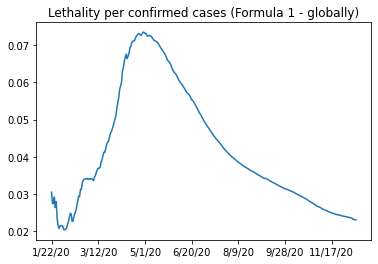

In [107]:
grouped_per_day['lethality_ratio_1_day'].plot()
plt.title("Lethality per confirmed cases (Formula 1 - globally)")
plt.show()

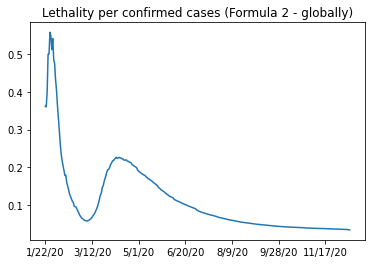

In [106]:
grouped_per_day['lethality_ratio_2_day'].plot()
plt.title("Lethality per confirmed cases (Formula 2 - globally)")
plt.show()

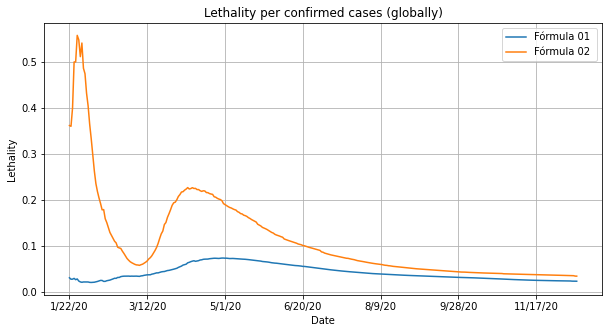

In [115]:
plt.figure(figsize=(10,5))
grouped_per_day['lethality_ratio_1_day'].plot()
ax = grouped_per_day['lethality_ratio_2_day'].plot()
plt.legend(['Fórmula 01 ','Fórmula 02'])
plt.grid(True)
ax.set_xlabel("Date")
ax.set_ylabel("Lethality")
plt.title("Lethality per confirmed cases (globally)")
plt.show()

They are converging to the same number, as expected.